<a href="https://colab.research.google.com/github/yanym/Cannabis-impairment-detection/blob/master/Tdap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22


In [0]:
import csv
import collections  
import numpy as np
from datetime import datetime, timedelta

In [0]:
input_list = []
with open("new_input.csv","r",encoding="utf-8") as file1:
	input_ = csv.DictReader(file1)
	for val in input_:
		input_list.append(val)

In [544]:
train_list = []
with open("selfTrain_del.csv","r",encoding="utf-8") as file1:
	input_ = csv.DictReader(file1)
	for val in input_:
		train_list.append(val)
print(len(train_list))

1900


In [0]:
pred_list = []
with open("predict.csv","r",encoding="utf-8") as file1:
	input_ = csv.DictReader(file1)
	for val in input_:
		pred_list.append(val)

In [546]:
valid_list = []
with open("selfValid_del.csv","r",encoding="utf-8") as file1:
	input_ = csv.DictReader(file1)
	for val in input_:
		valid_list.append(val)
print(len(valid_list))

639


In [547]:
# Vectorized all in input.csv
last = train_list[0]['PTID_Key']
totalVectors_train = []
temp1 = []
temp2 = []

idRecord = []

for i in range(len(train_list)):
    temp1 = []
    
    temp1.append(train_list[i]['ADAS13'])
    temp1.append(train_list[i]['Ventricles_Norm'])
    temp1.append(train_list[i]['MMSE'])
    temp2.append(temp1)
  
    if i == len(train_list) - 1 or train_list[i]['PTID_Key'] != train_list[i + 1]['PTID_Key'] :
        idRecord.append(train_list[i]['PTID_Key'])
        totalVectors_train.append(temp2)
        temp2 = []


print("Train:")
print(totalVectors_train)  # n * 3 * 5000+
print(len(totalVectors_train))
    
    
    
    
last = train_list[0]['PTID_Key']
totalVectors_input = []
temp3 = []
temp4 = []
id_not_find = []
index_not_find = []
print(idRecord)
#for num in idRecord:
for index in range(len(idRecord)):
    find = False
    for i in range(len(input_list)):
        if float(input_list[i]['PTID_Key']) != float(idRecord[index]):
            continue
        #print(input_list[i]['PTID_Key'])
        find = True
        temp3 = []

        temp3.append(input_list[i]['ADAS13'])
        temp3.append(input_list[i]['Ventricles_Norm'])
        temp3.append(input_list[i]['MMSE'])
        temp4.append(temp3)
        last = input_list[i]['PTID_Key']
        
        if i == len(input_list) - 1 or input_list[i]['PTID_Key'] != input_list[i + 1]['PTID_Key'] :
            idRecord.append(input_list[i]['PTID_Key'])
            totalVectors_input.append(temp4)
            temp4 = []
            
    if find is False:
        id_not_find.append(idRecord[index])
        index_not_find.append(index)

    
# Note: Do inverse pop!
for i in range(len(totalVectors_train)-1, -1, -1): 
    if i in index_not_find:
        totalVectors_train.pop()
        
print("Input:")
print(totalVectors_input)  
print(len(totalVectors_input))
print("index No:")
print(index_not_find)
print(id_not_find)
print(len(id_not_find))
print("Trim totalVectors_train list:")
print(totalVectors_train)  
print(len(totalVectors_train))
print("Now you have totalVectors_train and totalVectors_input")

Train:
[[['5', '0.012128', '30'], ['5', '0.012128', '30'], ['5', '0.012128', '30']], [['14', '0.020526', '30'], ['9', '0.020526', '30'], ['12', '0.020526', '29'], ['12', '0.020526', '29']], [['9', '0.0068537', '29'], ['7', '0.0066655', '29'], ['8', '0.0066655', '28'], ['8', '0.0066655', '28'], ['12', '0.006617', '27'], ['10', '0.006617', '27']], [['12', '0.035729', '28'], ['18', '0.035729', '27'], ['18', '0.035729', '27'], ['12', '0.03368', '26'], ['17', '0.033158', '29'], ['16', '0.033158', '26']], [['18', '0.019277', '28'], ['18', '0.017681', '28'], ['18', '0.016191', '28']], [['8', '0.013821', '30'], ['8', '0.013821', '30'], ['3', '0.013821', '30'], ['3', '0.013821', '30']], [['6', '0.026804', '30'], ['8', '0.026804', '28'], ['9', '0.02618', '30'], ['6', '0.02618', '30'], ['7', '0.02618', '28']], [['5', '0.024422', '28'], ['5', '0.024422', '28'], ['4', '0.022541', '30'], ['6', '0.022541', '29']], [['9', '0.011139', '29'], ['13', '0.011139', '28']], [['11', '0.017686', '29'], ['9', '

In [548]:
# Valid
last = valid_list[0]['PTID_Key']
totalVectors_valid_prev = [] # All Valid except last item for each PTID
# totalVectors_valid_last = []
temp1 = []
temp2 = []

idRecord_len1 = []

for i in range(len(valid_list)):
    temp1 = []
    
    temp1.append(valid_list[i]['ADAS13'])
    temp1.append(valid_list[i]['Ventricles_Norm'])
    temp1.append(valid_list[i]['MMSE'])
    temp2.append(temp1)
  
    if i == len(valid_list) - 1 or valid_list[i]['PTID_Key'] != valid_list[i + 1]['PTID_Key'] :
        if len(temp2) != 1:
            temp2.pop(len(temp2) - 1)
        else :
            idRecord_len1.append(valid_list[i]['PTID_Key'])
         
        #idRecord.append(valid_list[i]['PTID_Key'])
        totalVectors_valid_prev.append(temp2)
        temp2 = []
    
print(totalVectors_valid_prev) 
print(len(totalVectors_valid_prev))

[[['16', '0.019279', '28'], ['23', '0.019279', '27'], ['23', '0.019279', '27'], ['29', '0.019279', '27']], [['25', '0.042373', '26'], ['25', '0.046655', '25']], [['8', '0.033172', '30'], ['8', '0.033172', '30'], ['7', '0.033172', '29'], ['7', '0.033172', '29']], [['15', '0.022869', '28'], ['15', '0.022869', '28']], [['19', '0.020825', '26'], ['23', '0.020825', '25'], ['23', '0.020825', '25'], ['22', '0.020825', '24']], [['17', '0.026038', '27'], ['14', '0.026768', '30'], ['14', '0.028355', '30'], ['14', '0.028355', '29']], [['18', '0.055276', '25'], ['18', '0.055276', '25'], ['18', '0.055276', '25'], ['18', '0.055276', '25']], [['24', '0.018202', '26'], ['33', '0.020274', '25'], ['33', '0.020274', '25'], ['39', '0.023814', '20']], [['13', '0.028776', '28'], ['15', '0.031526', '27'], ['19', '0.031526', '29']], [['12', '0.019188', '29'], ['15', '0.019188', '30'], ['17', '0.021078', '30'], ['17', '0.021078', '30']], [['10', '0.029463', '30'], ['8', '0.031277', '30']], [['3', '0.013709', '

In [549]:
'''
# 这个cor
index_record = []
for item_valid in totalVectors_valid_prev:
    len1= len(item_valid)
    #print(item_valid)
    A_list1 = []
    V_list1 = []
    M_list1 = []
    for a in item_valid:
        A_list1.append(float(a[0]))
        V_list1.append(float(a[1]))
        M_list1.append(float(a[2]))
    error = 9999
    corr = -1
    index = -1
    
    track_input_num = -1
    for item_input in totalVectors_input:
        track_input_num += 1
        len2 = len(item_input)
        if len2 == 1:
            continue
        
        
        A_list1_temp = A_list1
        V_list1_temp = V_list1
        M_list1_temp = M_list1
        
        if len1 != 1:
            A_list2 = []
            V_list2 = []
            M_list2 = []
            for b in item_input:
                A_list2.append(float(b[0]))
                V_list2.append(float(b[1]))
                M_list2.append(float(b[2]))
               
            if len1 < len2:
                A_list2 = A_list2[:len1]
                V_list2 = V_list2[:len1]
                M_list2 = M_list2[:len1]
            #print(A_list1)
            if len1 > len2:
                A_list1_temp = A_list1[:len2]
                V_list1_temp = V_list1[:len2]
                M_list1_temp = M_list1[:len2]

            #print(A_list1_temp)
            #print(A_list2)
            c1 = abs(np.corrcoef(A_list1_temp, A_list2)[0][1]) if np.isnan(np.corrcoef(A_list1_temp, A_list2)[0][1]) is False else 0
            c2 = abs(np.corrcoef(V_list1_temp, V_list2)[0][1]) if np.isnan(np.corrcoef(V_list1_temp, A_list2)[0][1]) is False else 0
            c3 = abs(np.corrcoef(M_list1_temp, M_list2)[0][1]) if np.isnan(np.corrcoef(M_list1_temp, A_list2)[0][1]) is False else 0
            
            new_corr = c1 + c2 + c3
            #print(V_list1_temp)
            #print(V_list2)
            #print(np.corrcoef(V_list1_temp, V_list2))
            #print(np.corrcoef(A_list1_temp, A_list2))
            #print(np.corrcoef(V_list1_temp, V_list2))
            #print(np.corrcoef(M_list1_temp, M_list2))
            #print("No:")
            #print(track_input_num)
            #print(corr)
            #print(np.corrcoef(A_list1_temp, A_list2)[0][1])
            #print(np.corrcoef(V_list1_temp, V_list2)[0][1])
            #print(np.corrcoef(M_list1_temp, M_list2)[0][1])
            #print()
            if (new_corr > corr):
                corr = new_corr
                #print("Check1")
                index = track_input_num
                #print(index)
                
        else:
            new_err = abs(float(item_input[-1][0]) - A_list1[0]) + abs(float(item_input[-1][1]) - A_list1[0]) + abs(float(item_input[-1][2]) - A_list1[0])
            if error >= new_err:
                error = new_err
                #print("Check2")
                index = track_input_num
    index_record.append(index)
print(index_record)
'''

'\n# 这个cor\nindex_record = []\nfor item_valid in totalVectors_valid_prev:\n    len1= len(item_valid)\n    #print(item_valid)\n    A_list1 = []\n    V_list1 = []\n    M_list1 = []\n    for a in item_valid:\n        A_list1.append(float(a[0]))\n        V_list1.append(float(a[1]))\n        M_list1.append(float(a[2]))\n    error = 9999\n    corr = -1\n    index = -1\n    \n    track_input_num = -1\n    for item_input in totalVectors_input:\n        track_input_num += 1\n        len2 = len(item_input)\n        if len2 == 1:\n            continue\n        \n        \n        A_list1_temp = A_list1\n        V_list1_temp = V_list1\n        M_list1_temp = M_list1\n        \n        if len1 != 1:\n            A_list2 = []\n            V_list2 = []\n            M_list2 = []\n            for b in item_input:\n                A_list2.append(float(b[0]))\n                V_list2.append(float(b[1]))\n                M_list2.append(float(b[2]))\n               \n            if len1 < len2:\n          

In [550]:
# 最小距离
index_record = []
for item_valid in totalVectors_valid_prev:
    #print(len(totalVectors_valid_prev))
    len1= len(item_valid)
    #print(item_valid)
    A_list1 = []
    V_list1 = []
    M_list1 = []
    for a in item_valid:
        A_list1.append(float(a[0]))
        V_list1.append(float(a[1]))
        M_list1.append(float(a[2]))
    dist = 9999
    index = -1
    
    track_input_num = -1
    for item_input in totalVectors_input:
        track_input_num += 1
        len2 = len(item_input)
        if len2 == 1:
            continue
        
        A_list1_temp = A_list1
        V_list1_temp = V_list1
        M_list1_temp = M_list1

        A_list2 = []
        V_list2 = []
        M_list2 = []
        
        for b in item_input:
            A_list2.append(float(b[0]))
            V_list2.append(float(b[1]))
            M_list2.append(float(b[2]))

        if len1 < len2:
            A_list2 = A_list2[:len1]
            V_list2 = V_list2[:len1]
            M_list2 = M_list2[:len1]
        #print(A_list1)
        if len1 > len2:
            A_list1_temp = A_list1[:len2]
            V_list1_temp = V_list1[:len2]
            M_list1_temp = M_list1[:len2]

        new_dist = np.sqrt(np.sum(np.square(np.asarray(A_list1_temp) - np.asarray(A_list2)))) + 1100 * np.sqrt(np.sum(np.square(np.asarray(V_list1_temp) - np.asarray(V_list2)))) + np.sqrt(np.sum(np.square(np.asarray(M_list1_temp) - np.asarray(M_list2))))
        if dist > new_dist:
            dist = new_dist
            index = track_input_num       
        
    index_record.append(index)
print(index_record)
print(len(index_record))

[235, 105, 51, 279, 92, 370, 201, 120, 46, 443, 77, 436, 201, 230, 120, 270, 80, 312, 381, 334, 434, 157, 192, 196, 143, 332, 255, 0, 90, 142, 34, 230, 196, 136, 343, 386, 43, 89, 196, 125, 420, 27, 221, 90, 118, 110, 251, 59, 394, 279, 11, 68, 77, 343, 70, 68, 421, 196, 46, 89, 51, 439, 69, 417, 121, 349, 390, 90, 201, 288, 125, 92, 186, 70, 352, 60, 251, 327, 390, 120, 120, 129, 120, 279, 251, 98, 201, 234, 29, 381, 105, 150, 354, 361, 394, 245, 104, 210, 361, 214, 217, 120, 51, 415, 452, 161, 169, 74, 90, 180, 147, 312, 150, 377, 436, 439, 260, 245, 349, 118, 294, 434, 185, 27, 22, 245, 171, 434, 90, 89, 434, 384, 90, 343, 136, 361, 43, 373, 4, 434, 92, 162, 153, 397, 120, 418, 330, 279, 377, 120, 445, 59, 65, 141, 260]
155


In [551]:
pred = []
for index in index_record:
    len_train = totalVectors_train[index]
    pred.append(totalVectors_train[index][-1])
print(len(pred))

155


In [552]:
valid_list = []
with open("selfValid_del.csv","r",encoding="utf-8") as file1:
	input_ = csv.DictReader(file1)
	for val in input_:
		valid_list.append(val)
#print(len(valid_list))


# Valid
last = valid_list[0]['PTID_Key']
count = 0

for i in range(len(valid_list)):
    if i == len(valid_list) - 1 or valid_list[i]['PTID_Key'] != valid_list[i + 1]['PTID_Key'] :
        #print(len(pred[count]))
        valid_list[i]['ADAS13'] = pred[count][0]
        valid_list[i]['Ventricles_Norm'] = pred[count][1]
        valid_list[i]['MMSE'] = pred[count][2]
        valid_list[i]['CN_Diag'] = ''
        valid_list[i]['MCI_Diag'] = ''
        valid_list[i]['AD_Diag'] = ''
        count += 1       
        
print("Done")

Done


In [0]:
def dict2csv(valList) :
	try :
		file = open("valid_pred.csv", 'w')
		for item in valList:
			for i in item:
				file.write(i)
				file.write(",")
			file.write("\n")
			break
		for item in valList:
			for i in item:
				file.write(item.get(i))
				file.write(",")
			file.write("\n")

	except Exception :
		print ("Err")

	finally :
		file.close()
        
dict2csv(valid_list)

In [554]:
'''
for i in totalVectors_train:
    for j in i:
        j = np.asarray(j)
    i = np.array(i)
    
for i in totalVectors_input:
    for j in i:
        j = np.asarray(j)
    i = np.array(i)
'''
import copy


X_train_pre = totalVectors_input
y_train_pre = totalVectors_train

X_train_processed = []
y_train_processed = []


total = 0
for i, j in zip(X_train_pre, y_train_pre):
    X_train_processed.append(i)
    length = len(j)
    y_train_processed.append(j[0])
    count = 1
    total += length 
    
    while length - 1 >= 1:
        #
        # YOU MUST SHOULD DEEPCOPY IT!!!!!!!!!!!!!!!
        #
        #
        temp_X = copy.deepcopy(i)
        #print(temp_X)
        temp_X.append(j[count - 1])
        X_train_processed.append(temp_X)
        y_train_processed.append(j[count])
        
        count += 1
        length -= 1
        

max_t = 0
for i in range(len(X_train_processed)):
    while len(X_train_processed[i]) < 10:
        X_train_processed[i].append([-1, -1, -1])       
        
'''
for i in range(len(X_train_processed)):
    while X_train_processed[i].shape[0] < 10:
        X_train_processed[i] = np.append(X_train_processed[i], [[-1,-1,-1]], axis=0)
        
        #print(X_train_processed[i])
        #X_train_processed[i].append(np.array([-1,-1,-1]))
'''
     

temp0 = []
for i in X_train_processed:
    temp1 = []
    for j in i:
        temp2 = []
        for k in j:
            temp2.append(float(k))
        #temp2 = np.array(temp2)
        temp1.append(temp2)
    #temp1 = np.array(temp1)
    temp0.append(temp1)
temp0 = np.array(temp0)
        
print(temp0.shape)    
    
temp00 = []
for i in y_train_processed:
    temp1 = []
    for j in i:
        temp1.append(float(j))
    #temp1 = np.array(temp1)
    temp00.append(temp1)
temp00 = np.array(temp00)

print(temp00.shape)
X_train_processed = temp0
y_train_processed = temp00


(1829, 10, 3)
(1829, 3)


In [563]:



X_test = X_train_processed[1500:, : , :]
y_test = y_train_processed[1500:, :]

X_train = X_train_processed[:1500, : , :]
y_train = y_train_processed[:1500, :]

# print(X_train.shape)
#print(X_train[0].shape)
#print(X_train[1].shape)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


#xasijd = np.reshape(X_train_processed, 1829, 10, 3)

(1500, 10, 3)
(1500, 3)
(329, 10, 3)
(329, 3)


In [0]:
import time
import csv
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential, load_model

from keras.layers import Masking, Embedding


def build_model():
    model = Sequential()
    # 变长度caonm
    model.add(Masking(mask_value= -1,input_shape=(10, 3)))
    # 变长度
    layers = [-1, 80, 3, 3]
    
    model.add(LSTM(layers[1], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(layers[2], return_sequences=False))
    model.add(Dropout(0.2))
   
    model.add(Dense(layers[3]))
    #model.add(Activation("softmax"))
    model.add(Activation("linear"))
    
  
    model.compile(loss="mse", optimizer="rmsprop")
    return model

In [0]:
import matplotlib.pyplot as plt
def run_network(model=None, data=None):
    epochs = 200
    X_train, y_train, X_test, y_test = data

    print('\nData Loaded. Compiling...\n')

    if model is None:
        model = build_model()

    try:
        model.fit(
            X_train, y_train,
            batch_size=32, nb_epoch=epochs, validation_split=0.05)
        predicted = model.predict(X_test)
        print(predicted[:10])
        print(y_test[:10])
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        #print('Training duration (s) : ', time.time() - global_start_time)
        return model, y_test, 0
    
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(y_test[:100, 0])
        plt.plot(predicted[:100, 0])
        plt.show()
    except Exception as e:
        print(str(e))
    #print('Training duration (s) : ', time.time() - global_start_time)
    return model, y_test, predicted



Data Loaded. Compiling...



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1425 samples, validate on 75 samples
Epoch 1/200
1425/1425 [==============================] - 15s 11ms/step - loss: 348.7464 - val_loss: 312.2108
Epoch 2/200
1425/1425 [==============================] - 4s 3ms/step - loss: 334.7380 - val_loss: 306.2791
Epoch 3/200
1425/1425 [==============================] - 5s 3ms/step - loss: 329.7100 - val_loss: 301.6874
Epoch 4/200
1425/1425 [==============================] - 4s 3ms/step - loss: 326.2810 - val_loss: 297.2506
Epoch 5/200
1425/1425 [==============================] - 5s 3ms/step - loss: 320.2111 - val_loss: 292.8480
Epoch 6/200
1425/1425 [==============================] - 5s 3ms/step - loss: 315.1368 - val_loss: 288.4933
Epoch 7/200
1425/1425 [==============================] - 5s 3ms/step - loss: 310.6775 - val_loss: 284.2097
Epoch 8/200
1425/1425 [==============================] - 5s 3ms/step - loss: 306.6578 - val_loss: 279.9868
Epoch 9/200
1425/1425 [==============================] - 5s 3ms/step - loss: 302.3191 - val_loss

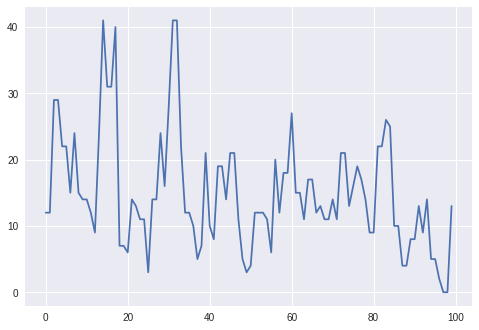

In [645]:
model = build_model()
(trained_model, y_t, pred) = run_network(model, [X_train, y_train, X_test, y_test])

In [646]:
print(predicted)
print()
print(y_test)

NameError: ignored